In [40]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

In [24]:
def count_words(sequence, w):
    count_dict = {}
    for i in range(0, len(sequence) - w + 1):
        word = sequence[i:i+w]
        if word not in count_dict:
            count_dict[word] = 1
        else:
            count_dict[word] += 1
    return count_dict

def index_fasta_file(fasta_filename, w = 4):
    word_dict = {} # Stores each of the protein data points
    sequence = "" # Start building the sequence, since it can be spread across multiple lines
    row = 0 # Keep track of which sequence we have processed
    with open(fasta_filename, 'r') as fasta_file:
        for line in fasta_file: # Loop through the file line-by-line
            if line[0] == ">": # Every time it hits a label, we are done processing the last sequence
                if len(sequence) >= w:
                    # Count the words using the function above
                    count_dict = count_words(sequence, w)
                    # For each word, we want to add it to our matrix that we are building
                    for word, count in count_dict.items():
                        # If we've seen the word before, append to the existing count list
                        if word in word_dict:
                            word_dict[word] = word_dict[word].append(
                                                              pd.Series([count],index=[row])
                                                                    )
                        # If it's a new word, start a counting list
                        else:
                            word_dict[word] = pd.Series([count],index=[row])
                    row += 1
                sequence = ""
            else: # We have a protein sequence, not a label
                sequence += line.strip() # Build the full sequence string, removing trailing whitespace with strip() 
    return pd.DataFrame(word_dict).fillna(0) # Return the counts as a DataFrame

In [25]:
word_size=1
mouse_ngram = index_fasta_file("data/mouse.fasta" , word_size)
rat_ngram = index_fasta_file("data/rat.fasta" , word_size)

In [26]:
word_size=2
mouse_ngram2 = index_fasta_file("data/mouse.fasta" , word_size)
rat_ngram2 = index_fasta_file("data/rat.fasta" , word_size)

In [27]:
mouse_ngram.to_csv("1.csv", index= False)
rat_ngram.to_csv("2.csv", index= False)
mouse_ngram2.to_csv("3.csv", index= False)
rat_ngram2.to_csv("4.csv", index= False)

In [34]:
means_mouse=mouse_ngram.mean(axis=0)
means_rat=rat_ngram.mean(axis=0)
means_mouse2=mouse_ngram2.mean(axis=0)
means_rat2=rat_ngram2.mean(axis=0)
mouse_ngram[mouse_ngram<means_mouse]=0
mouse_ngram[mouse_ngram>=means_mouse]=1
mouse_ngram2[mouse_ngram2<means_mouse2]=0
mouse_ngram2[mouse_ngram2>=means_mouse2]=1
rat_ngram[mouse_ngram<means_rat]=0
rat_ngram[mouse_ngram>=means_rat]=1
rat_ngram2[mouse_ngram2<means_rat2]=0
rat_ngram2[mouse_ngram2>=means_rat2]=1
labels1 = [0]*mouse_ngram.shape[0] + [1]*rat_ngram.shape[0]
labels2 = [0]*mouse_ngram2.shape[0] + [1]*rat_ngram2.shape[0]
data1 = mouse_ngram.append(rat_ngram).fillna(0)
data2=mouse_ngram2.append(rat_ngram2).fillna(0)
data1['labels']=pd.Series(labels1, index=data1.index)
data2['labels']=pd.Series(labels2, index=data2.index)
data1.to_csv("data1_2condition.csv", index= False)
data2.to_csv("data2_2condition.csv", index= False)

In [37]:
mouse_ngram=pd.read_csv("1.csv")
rat_ngram=pd.read_csv("2.csv")
mouse_ngram2=pd.read_csv("3.csv")
rat_ngram2=pd.read_csv("4.csv")
means_mouse=mouse_ngram.mean(axis=0)
means_rat=rat_ngram.mean(axis=0)
means_mouse2=mouse_ngram2.mean(axis=0)
means_rat2=rat_ngram2.mean(axis=0)

mouse_ngram[mouse_ngram<means_mouse/2]=0
mouse_ngram[(mouse_ngram>means_mouse/2)&(mouse_ngram<means_mouse)]=1
mouse_ngram[(mouse_ngram>=means_mouse)&(mouse_ngram<3*means_mouse/2)]=2
mouse_ngram[mouse_ngram>3*means_mouse/2]=3
rat_ngram[rat_ngram<means_rat/2]=0
rat_ngram[(rat_ngram>means_rat/2)&(rat_ngram<means_rat)]=1
rat_ngram[(rat_ngram>=means_rat)&(rat_ngram<3*means_rat/2)]=2
rat_ngram[rat_ngram>3*means_rat/2]=3

mouse_ngram2[mouse_ngram2<means_mouse2/2]=0
mouse_ngram2[(mouse_ngram2>means_mouse2/2)&(mouse_ngram2<means_mouse2)]=1
mouse_ngram2[(mouse_ngram2>=means_mouse2)&(mouse_ngram2<3*means_mouse2/2)]=2
mouse_ngram2[mouse_ngram2>3*means_mouse2/2]=3
rat_ngram2[rat_ngram2<means_rat2/2]=0
rat_ngram2[(rat_ngram2>means_rat2/2)&(rat_ngram2<means_rat2)]=1
rat_ngram2[(rat_ngram2>=means_rat2)&(rat_ngram2<3*means_rat2/2)]=2
rat_ngram2[rat_ngram2>3*means_rat2/2]=3

labels1 = [0]*mouse_ngram.shape[0] + [1]*rat_ngram.shape[0]
labels2 = [0]*mouse_ngram2.shape[0] + [1]*rat_ngram2.shape[0]
data1 = mouse_ngram.append(rat_ngram).fillna(0)
data2=mouse_ngram2.append(rat_ngram2).fillna(0)
data1['labels']=pd.Series(labels1, index=data1.index)
data2['labels']=pd.Series(labels2, index=data2.index)
data1.to_csv("data1_4condition.csv", index= False)
data2.to_csv("data2_4condition.csv", index= False)



In [38]:
mouse_ngram=pd.read_csv("1.csv")
rat_ngram=pd.read_csv("2.csv")
mouse_ngram2=pd.read_csv("3.csv")
rat_ngram2=pd.read_csv("4.csv")
labels1 = [0]*mouse_ngram.shape[0] + [1]*rat_ngram.shape[0]
labels2 = [0]*mouse_ngram2.shape[0] + [1]*rat_ngram2.shape[0]
data1 = mouse_ngram.append(rat_ngram).fillna(0)
data2=mouse_ngram2.append(rat_ngram2).fillna(0)
data1['labels']=pd.Series(labels1, index=data1.index)
data2['labels']=pd.Series(labels2, index=data2.index)
data1.to_csv("data1_normal.csv", index= False)
data2.to_csv("data2_normal.csv", index= False)

In [48]:
data1=pd.read_csv("data1_normal.csv")
data2=pd.read_csv("data2_normal.csv")
data1=data1.sample(frac=1).reset_index(drop=True)
data2=data2.sample(frac=1).reset_index(drop=True)
train1=normalize(data1.iloc[:,0:-1], axis=1)
target1=data1['labels']
train2=normalize(data2.iloc[:,0:-1], axis=1)
target2=data2['labels']


dataB1=pd.read_csv("data1_2condition.csv")
dataB2=pd.read_csv("data2_2condition.csv")
dataB1=dataB1.sample(frac=1).reset_index(drop=True)
dataB2=dataB2.sample(frac=1).reset_index(drop=True)
trainB1=dataB1.iloc[:,0:-1]
targetB1=dataB1['labels']
trainB2=dataB2.iloc[:,0:-1]
targetB2=dataB2['labels']


In [59]:
NB=GaussianNB()
RF=RandomForestClassifier()
rf_scores_normal1=cross_val_score(RF, train1, target1, cv=10)
rf_scores_normal2=cross_val_score(RF, train2, target2, cv=10)
rf_scores_condition1=cross_val_score(RF, trainB1, targetB1, cv=10)
rf_scores_condition2=cross_val_score(RF, trainB2, targetB2, cv=10)
nb_scores_normal1=cross_val_score(NB, train1, target1, cv=10)
nb_scores_normal2=cross_val_score(NB, train2, target2, cv=10)
nb_scores_condition1=cross_val_score(NB, trainB1, targetB1, cv=10)
nb_scores_condition2=cross_val_score(NB, trainB2, targetB2, cv=10)

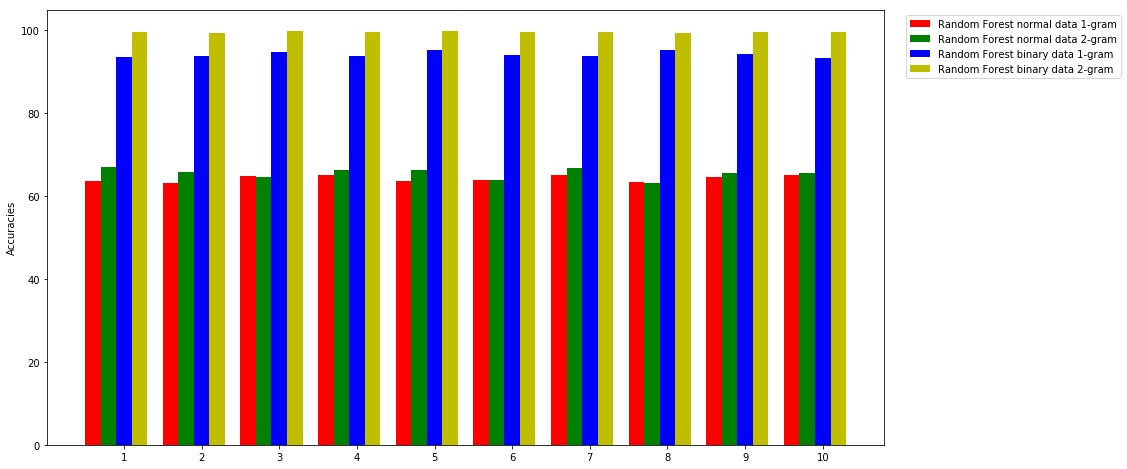

In [115]:

import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind,rf_scores_normal1*100, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, rf_scores_normal2*100, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, rf_scores_condition1*100, width, color='b')
kvals = [11,12,13]
rects4 = ax.bar(ind+width*3, rf_scores_condition2*100, width, color='y')

ax.set_ylabel('Accuracies')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( range(1,11) )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('Random Forest normal data 1-gram','Random Forest normal data 2-gram','Random Forest binary data 1-gram', 'Random Forest binary data 2-gram'),bbox_to_anchor=(1.02, 1) )

fig.set_size_inches(15, 8, forward=True)
fig.savefig('to.png')

plt.show()






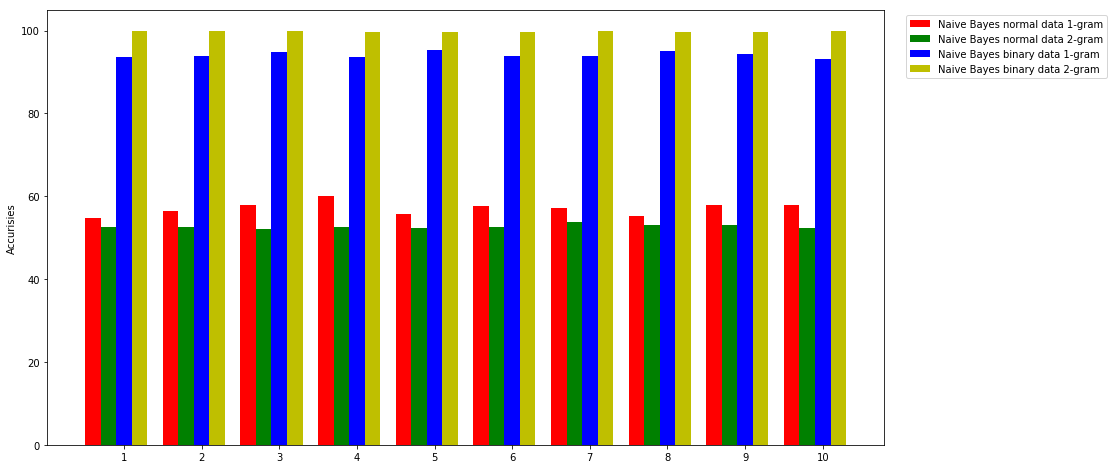

In [114]:


N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind,nb_scores_normal1*100, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, nb_scores_normal2*100, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, nb_scores_condition1*100, width, color='b')
kvals = [11,12,13]
rects4 = ax.bar(ind+width*3, nb_scores_condition2*100, width, color='y')

ax.set_ylabel('Accurisies')
ax.set_xticks(ind+width*2)
ax.set_xticklabels( range(1,11) )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('Naive Bayes normal data 1-gram','Naive Bayes normal data 2-gram','Naive Bayes binary data 1-gram', 'Naive Bayes binary data 2-gram'),bbox_to_anchor=(1.02, 1) )

fig.set_size_inches(15, 8, forward=True)
fig.savefig('to.png')

plt.show()






In [116]:
from scipy import stats
t1,p1=stats.ttest_rel(rf_scores_normal1,rf_scores_normal2)
t2,p2=stats.ttest_rel(rf_scores_normal1,rf_scores_condition1)
t3,p3=stats.ttest_rel(rf_scores_normal2,rf_scores_condition2)
t4,p4=stats.ttest_rel(rf_scores_condition1,rf_scores_condition2)


print(p1)
print(p2)
print(p3)
print(p4)

0.0142867801207
3.48767636681e-14
9.82664858851e-15
1.3174869096e-09


In [117]:
t1,p1=stats.ttest_rel(nb_scores_normal1,nb_scores_normal2)
t2,p2=stats.ttest_rel(nb_scores_normal1,nb_scores_condition1)
t3,p3=stats.ttest_rel(nb_scores_normal2,nb_scores_condition2)
t4,p4=stats.ttest_rel(nb_scores_condition1,nb_scores_condition2)


print(p1)
print(p2)
print(p3)
print(p4)

1.49478692575e-05
4.15977891857e-13
1.26383295309e-19
1.30741009627e-09
